# Assignment 10

## Part A

### Load the train and test datasets into pandas dataframes

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
#read the csv files
severity_train = pd.read_csv(os.path.join(os.getcwd(),'all_state_claim_severity\\train.csv'))
severity_test = pd.read_csv(os.path.join(os.getcwd(),'all_state_claim_severity\\test.csv'))

### Figure out which variables are categorical and which are numeric. Linear models only accept numeric variables. You can either drop the categorical columns OR turn them into numeric variables (one-hot encoding, perturbed rate-by-level, label encoding, BLUP, etc). Many times these columns are very useful and dropping them will hurt your model.

In [3]:
severity_train.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [4]:
severity_train.dtypes

id          int64
cat1       object
cat2       object
cat3       object
cat4       object
cat5       object
cat6       object
cat7       object
cat8       object
cat9       object
cat10      object
cat11      object
cat12      object
cat13      object
cat14      object
cat15      object
cat16      object
cat17      object
cat18      object
cat19      object
cat20      object
cat21      object
cat22      object
cat23      object
cat24      object
cat25      object
cat26      object
cat27      object
cat28      object
cat29      object
           ...   
cat102     object
cat103     object
cat104     object
cat105     object
cat106     object
cat107     object
cat108     object
cat109     object
cat110     object
cat111     object
cat112     object
cat113     object
cat114     object
cat115     object
cat116     object
cont1     float64
cont2     float64
cont3     float64
cont4     float64
cont5     float64
cont6     float64
cont7     float64
cont8     float64
cont9     float64
cont10    

* Cat1, cat2, cat3,..., cat116 are categorical variables while the cont1, cont2, cont3,..., cont14, id and loss are numeric variables.

In [5]:
#transform all the categoric variables into numimeric
from sklearn.preprocessing import LabelEncoder
for col in severity_train.columns:
    if severity_train[col].dtypes == 'O':
        le = LabelEncoder()
        le.fit(severity_train[col])
        severity_train[col] = le.transform(severity_train[col])

In [6]:
for col in severity_test.columns:
    if severity_test[col].dtypes == 'O':
        le = LabelEncoder()
        le.fit(severity_test[col])
        severity_test[col] = le.transform(severity_test[col])

In [7]:
severity_test.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,4,0,1,0,0,0,0,0,0,1,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,6,0,1,0,1,0,0,0,0,1,...,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,9,0,1,0,1,1,0,1,0,1,...,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,12,0,0,0,0,1,0,0,0,0,...,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,15,1,0,0,0,0,1,0,0,0,...,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


All the variables are numeric now.

In [8]:
# convert to data frames
severity_train_df = pd.DataFrame(severity_train)
severity_test_df = pd.DataFrame(severity_test)

### Feed your data to sci-kit learn’s Linear Regression algorithm

In [9]:
from sklearn import linear_model
# Create linear regression object
regr = linear_model.LinearRegression()
# split the data into two data
y_train = severity_train_df['loss']
x_train = severity_train_df.loc[:,'cat1':'cont14']
X_train = x_train.as_matrix()
X_train = np.array([np.concatenate((v,[1])) for v in X_train])
# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
# Evaluation metrics on test data
# The coefficients
print('Coefficients: \n', regr.coef_)
print("Intercept : ", regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f"
% np.mean((regr.predict(X_train) - y_train) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_train, y_train))
pred = regr.predict(X_train)

Coefficients: 
 [ -4.01957894e+02   3.29198398e+02   2.20569144e+02   3.55338608e+01
   1.11401473e+02  -3.14739342e+02   6.16419461e+02   6.83549635e+01
   5.69722327e+01   1.98722693e+02   1.08537943e+02   7.34068696e+02
   1.01188567e+02   4.17736911e+01  -6.42196463e+02  -4.09106901e+03
  -3.72020461e+03  -4.06342174e+03  -3.51617137e+03  -3.80233809e+03
  -4.36490518e+03  -4.83746200e+03   4.17035085e+02   1.66009843e+02
   5.47374154e+02   8.06898823e+02   5.88370234e+02   2.37757109e+02
   5.39512677e+02   1.75847989e+02   1.43924839e+02   7.66489818e+02
   2.96372808e+02   5.78847520e+02   8.42360271e+02  -5.56258510e+03
  -5.40869421e+03  -5.25495208e+03  -5.78077039e+03  -5.67639208e+03
  -5.87608288e+03  -5.15972334e+03  -5.69210415e+03  -5.09552796e+03
  -5.65372529e+03  -5.40885196e+03  -5.30551953e+03  -5.28528425e+03
   4.57418465e+02   3.63095238e+02   6.38911337e+02   4.33628322e+02
   8.72519869e+02   9.46030821e+01   3.38199871e+02   5.49806385e+02
   3.40893368e+03 

In [11]:
model1 = 'loss ~ '
for col in severity_train.columns:
    if col not in ['id', 'loss']:
        model1 = model1 + col + ' + '
model1 = model1[:-2]

In [12]:
#Building the Optimal Model using Backward Elimination
import statsmodels.formula.api as sm
regressor_OLS = sm.ols(model1, severity_train_df).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   loss   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     1351.
Date:                Sun, 19 Nov 2017   Prob (F-statistic):               0.00
Time:                        20:47:32   Log-Likelihood:            -1.7068e+06
No. Observations:              188318   AIC:                         3.414e+06
Df Residuals:                  188187   BIC:                         3.415e+06
Df Model:                         130                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1560.0490    285.803     -5.458      0.000   -2120.217    -999.881
cat1        -401.9579     12.385    -32.455      0.000    -426.232    -377.683
cat2         329.1984     30.386     10.834      0.000     269.642     388.755
cat3         220.5691     82.207      2.683      0.007      59.445     381.693
cat4          35.5339     25.888      1.373      0.170     -15.205      86.273
cat5         111.4015     20.173      5.522      0.000      71.862     150.941
cat6        -314.7393     31.930     -9.857      0.000    -377.322    -252.157
cat7         616.4195    138.356      4.455      0.000     345.244     887.595
cat8          68.3550     78.967      0.866      0.387     -86.418     223.128
cat9          56.9722     52.414      1.087      0.277     -45.759     159.703
cat10        198.7227     47.792      4.158      0.000     105.052     292.393
cat11        108.5379     48.478      2.239      0.025      13.522     203.554
cat12        734.0687     48.112     15.258      0.000     639.771     828.367
cat13        101.1886     48.528      2.085      0.037       6.074     196.303
cat14         41.7737     88.224      0.473      0.636    -131.143     214.691
cat15       -642.1965    361.198     -1.778      0.075   -1350.136      65.743
cat16      -4091.0690   2158.650     -1.895      0.058   -8321.972     139.834
cat17      -3720.2046   2161.745     -1.721      0.085   -7957.173     516.764
cat18      -4063.4217   2160.512     -1.881      0.060   -8297.975     171.131
cat19      -3516.1714   2158.845     -1.629      0.103   -7747.456     715.114
cat20      -3802.3381   2158.952     -1.761      0.078   -8033.834     429.158
cat21      -4364.9052   2157.083     -2.024      0.043   -8592.737    -137.073
cat22      -4837.4620   2139.230     -2.261      0.024   -9030.303    -644.620
cat23        417.0351     43.507      9.585      0.000     331.762     502.308
cat24        166.0098     51.587      3.218      0.001      64.901     267.118
cat25        547.3742     47.995     11.405      0.000     453.304     641.444
cat26        806.8988     47.203     17.094      0.000     714.382     899.416
cat27        588.3702     43.943     13.390      0.000     502.244     674.497
cat28        237.7571     52.010      4.571      0.000     135.818     339.696
cat29        539.5127     57.069      9.454      0.000     427.659     651.366
cat30        175.8480     56.983      3.086      0.002      64.162     287.534
cat31        143.9248     49.342      2.917      0.004      47.216     240.634
cat32        766.4898     74.348     10.309      0.000     620.769     912.211
cat33        296.3728     93.997      3.153      0.002     112.140     480.605
cat34        578.8475    105.832      5.469      0.000     371.419     786.276
cat35        842.3603    148.937      5.656      0.000     550.448    1134.273
ca

In [13]:
#imporve the model according to the former results
regressor_OLS = sm.ols('loss ~ cat1 + cat2 + cat3 + cat5 + cat6 + cat7 + cat10 + cat11 + cat12 + cat13 + cat21 + cat22 + cat23 + cat24 + cat25 + cat26 + cat27 + cat28 + cat29 + cat30 + cat31 + cat32 + cat33 + cat34 + cat35 + cat36 + cat37 + cat38 + cat39 + cat40 + cat41 + cat42 + cat43 + cat44 + cat45 + cat46 + cat47 + cat48 + cat49 + cat50 + cat51 + cat52 + cat53 + cat54 + cat56 + cat57 + cat65 + cat67 + cat68 + cat71 + cat72 + cat73 + cat75 + cat76 + cat77 + cat78 + cat79 + cat80 + cat81 + cat82 + cat83 + cat84 + cat85 + cat86 + cat87 + cat88 + cat92 + cat94 + cat95 + cat96 + cat97 + cat98 + cat99 + cat100 + cat101 + cat103 + cat104 + cat105 + cat106 + cat108 + cat109 + cat111 + cat112 + cat114 + cont1 + cont2 + cont3 + cont4 + cont5 + cont7 + cont8 + cont9 + cont10 + cont11 + cont12 + cont14', severity_train_df).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   loss   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     1826.
Date:                Sun, 19 Nov 2017   Prob (F-statistic):               0.00
Time:                        20:47:40   Log-Likelihood:            -1.7069e+06
No. Observations:              188318   AIC:                         3.414e+06
Df Residuals:                  188221   BIC:                         3.415e+06
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1481.7565    211.686     -7.000      0.000   -1896.656   -1066.857
cat1        -402.7538     12.364    -32.574      0.000    -426.987    -378.520
cat2         352.9730     22.882     15.426      0.000     308.126     397.820
cat3          71.1409     25.129      2.831      0.005      21.889     120.392
cat5         112.6831     20.142      5.595      0.000      73.206     152.160
cat6        -317.2069     31.865     -9.955      0.000    -379.661    -254.753
cat7         130.8145     53.585      2.441      0.015      25.789     235.840
cat10        154.8507     30.159      5.134      0.000      95.740     213.962
cat11         73.1644     29.830      2.453      0.014      14.698     131.630
cat12        694.3452     28.437     24.417      0.000     638.610     750.080
cat13         63.1003     29.344      2.150      0.032       5.587     120.614
cat21       -461.3677    105.371     -4.379      0.000    -667.892    -254.844
cat22      -1274.4415    319.891     -3.984      0.000   -1901.421    -647.462
cat23        394.3311     42.171      9.351      0.000     311.677     476.985
cat24        125.7193     46.428      2.708      0.007      34.722     216.717
cat25        511.4089     43.011     11.890      0.000     427.108     595.710
cat26        771.2512     41.913     18.401      0.000     689.103     853.400
cat27        565.4116     42.424     13.328      0.000     482.261     648.562
cat28        199.0070     47.594      4.181      0.000     105.724     292.290
cat29        502.3547     53.552      9.381      0.000     397.393     607.316
cat30        139.0816     52.903      2.629      0.009      35.393     242.770
cat31        108.6524     44.845      2.423      0.015      20.756     196.548
cat32        743.5552     71.962     10.333      0.000     602.511     884.600
cat33        263.9316     82.340      3.205      0.001     102.547     425.317
cat34        532.7046     96.850      5.500      0.000     342.880     722.529
cat35        806.9987    147.667      5.465      0.000     517.575    1096.422
cat36      -5593.5487   1488.412     -3.758      0.000   -8510.801   -2676.297
cat37      -5437.6509   1488.532     -3.653      0.000   -8355.139   -2520.163
cat38      -5284.2542   1488.777     -3.549      0.000   -8202.223   -2366.285
cat39      -5811.5963   1488.571     -3.904      0.000   -8729.160   -2894.032
cat40      -5711.0717   1488.593     -3.837      0.000   -8628.679   -2793.464
cat41      -5906.6485   1488.704     -3.968      0.000   -8824.473   -2988.824
cat42      -5179.8829   1488.106     -3.481      0.000   -8096.536   -2263.229
cat43      -5724.7128   1488.682     -3.845      0.000   -8642.495   -2806.931
cat44      -5127.6563   1488.652     -3.444      0.001   -8045.379   -2209.933
cat45      -5679.7468   1488.632     -3.815      0.000   -8597.430   -2762.063
ca

In [14]:
import statsmodels.formula.api as sm
regressor_OLS = sm.ols('loss ~ cat1 + cat2 + cat3 + cat5 + cat6 + cat7 + cat10 + cat11 + cat12 + cat13 + cat21 + cat22 + cat23 + cat24 + cat25 + cat26 + cat27 + cat28 + cat29 + cat30 + cat31 + cat32 + cat33 + cat34 + cat35 + cat36 + cat37 + cat38 + cat39 + cat40 + cat41 + cat42 + cat43 + cat44 + cat45 + cat46 + cat47 + cat48 + cat49 + cat50 + cat51 + cat52 + cat53 + cat54 + cat56 + cat57 + cat65 + cat67 + cat68 + cat71 + cat72 + cat73 + cat75 + cat76 + cat77 + cat78 + cat79 + cat80 + cat81 + cat82 + cat83 + cat84 + cat85 + cat86 + cat87 + cat88 + cat92 + cat94 + cat95 + cat96 + cat97 + cat98 + cat99 + cat100 + cat101 + cat103 + cat104 + cat105 + cat106 + cat108 + cat109 + cat112 + cat114 + cont1 + cont2 + cont3 + cont4 + cont5 + cont7 + cont8 + cont9 + cont10 + cont11 + cont12 + cont14', severity_train_df).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   loss   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     1845.
Date:                Sun, 19 Nov 2017   Prob (F-statistic):               0.00
Time:                        20:47:49   Log-Likelihood:            -1.7069e+06
No. Observations:              188318   AIC:                         3.414e+06
Df Residuals:                  188222   BIC:                         3.415e+06
Df Model:                          95                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1471.2659    211.585     -6.954      0.000   -1885.968   -1056.564
cat1        -402.7222     12.364    -32.572      0.000    -426.956    -378.489
cat2         355.4961     22.827     15.573      0.000     310.755     400.237
cat3          71.6430     25.127      2.851      0.004      22.395     120.891
cat5         114.9282     20.093      5.720      0.000      75.547     154.310
cat6        -314.7836     31.829     -9.890      0.000    -377.167    -252.400
cat7         130.3635     53.585      2.433      0.015      25.339     235.388
cat10        154.7717     30.159      5.132      0.000      95.661     213.883
cat11         71.5188     29.812      2.399      0.016      13.087     129.950
cat12        694.0588     28.436     24.408      0.000     638.324     749.793
cat13         63.1289     29.344      2.151      0.031       5.615     120.642
cat21       -459.5766    105.365     -4.362      0.000    -666.090    -253.063
cat22      -1272.0795    319.889     -3.977      0.000   -1899.054    -645.104
cat23        332.0235     16.160     20.546      0.000     300.350     363.697
cat24         72.3179     32.266      2.241      0.025       9.078     135.558
cat25        451.3064     20.933     21.559      0.000     410.277     492.335
cat26        716.7966     24.450     29.316      0.000     668.874     764.719
cat27        504.3127     18.463     27.315      0.000     468.126     540.499
cat28        140.6145     30.539      4.604      0.000      80.759     200.470
cat29        446.9599     40.849     10.942      0.000     366.897     527.023
cat30         86.9039     41.650      2.087      0.037       5.271     168.537
cat31         57.4006     31.377      1.829      0.067      -4.099     118.900
cat32        687.9088     62.996     10.920      0.000     564.439     811.379
cat33        222.1143     78.080      2.845      0.004      69.078     375.150
cat34        492.1941     93.481      5.265      0.000     308.973     675.415
cat35        765.3864    145.358      5.266      0.000     480.488    1050.284
cat36      -5598.0775   1488.415     -3.761      0.000   -8515.336   -2680.819
cat37      -5441.4300   1488.536     -3.656      0.000   -8358.926   -2523.933
cat38      -5287.1906   1488.782     -3.551      0.000   -8205.169   -2369.212
cat39      -5815.0277   1488.575     -3.906      0.000   -8732.601   -2897.455
cat40      -5714.8447   1488.597     -3.839      0.000   -8632.461   -2797.229
cat41      -5910.4140   1488.708     -3.970      0.000   -8828.247   -2992.581
cat42      -5183.6673   1488.111     -3.483      0.000   -8100.329   -2267.005
cat43      -5728.4167   1488.687     -3.848      0.000   -8646.207   -2810.626
cat44      -5130.3683   1488.657     -3.446      0.001   -8048.102   -2212.635
cat45      -5683.7704   1488.636     -3.818      0.000   -8601.462   -2766.079
ca

In [15]:
import statsmodels.formula.api as sm
regressor_OLS = sm.ols('loss ~ cat1 + cat2 + cat3 + cat5 + cat6 + cat7 + cat10 + cat11 + cat12 + cat13 + cat21 + cat22 + cat23 + cat24 + cat25 + cat26 + cat27 + cat28 + cat29 + cat30 + cat32 + cat33 + cat34 + cat35 + cat36 + cat37 + cat38 + cat39 + cat40 + cat41 + cat42 + cat43 + cat44 + cat45 + cat46 + cat47 + cat48 + cat49 + cat50 + cat51 + cat52 + cat53 + cat54 + cat56 + cat57 + cat65 + cat67 + cat68 + cat71 + cat72 + cat73 + cat75 + cat76 + cat77 + cat78 + cat79 + cat80 + cat81 + cat82 + cat83 + cat84 + cat85 + cat86 + cat87 + cat88 + cat92 + cat94 + cat95 + cat96 + cat97 + cat98 + cat99 + cat100 + cat101 + cat103 + cat104 + cat105 + cat106 + cat108 + cat109 + cat112 + cat114 + cont1 + cont2 + cont3 + cont4 + cont5 + cont7 + cont8 + cont9 + cont10 + cont11 + cont12 + cont14', severity_train_df).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   loss   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     1864.
Date:                Sun, 19 Nov 2017   Prob (F-statistic):               0.00
Time:                        20:47:57   Log-Likelihood:            -1.7069e+06
No. Observations:              188318   AIC:                         3.414e+06
Df Residuals:                  188223   BIC:                         3.415e+06
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1477.0292    211.563     -6.982      0.000   -1891.688   -1062.371
cat1        -403.5311     12.356    -32.658      0.000    -427.749    -379.313
cat2         354.9050     22.825     15.549      0.000     310.168     399.642
cat3          71.3110     25.126      2.838      0.005      22.064     120.558
cat5         114.0959     20.088      5.680      0.000      74.724     153.468
cat6        -315.4065     31.827     -9.910      0.000    -377.787    -253.026
cat7         130.2042     53.585      2.430      0.015      25.179     235.229
cat10        154.9893     30.159      5.139      0.000      95.878     214.100
cat11         71.0333     29.811      2.383      0.017      12.604     129.463
cat12        694.3800     28.436     24.419      0.000     638.646     750.114
cat13         64.0613     29.340      2.183      0.029       6.556     121.566
cat21       -458.9173    105.365     -4.355      0.000    -665.431    -252.404
cat22      -1269.9926    319.889     -3.970      0.000   -1896.968    -643.018
cat23        334.1460     16.119     20.731      0.000     302.554     365.738
cat24         73.6314     32.258      2.283      0.022      10.407     136.856
cat25        459.7391     20.420     22.514      0.000     419.717     499.761
cat26        717.3725     24.449     29.342      0.000     669.454     765.291
cat27        504.9063     18.460     27.352      0.000     468.725     541.087
cat28        140.0143     30.538      4.585      0.000      80.162     199.867
cat29        447.1682     40.849     10.947      0.000     367.105     527.231
cat30         87.2445     41.650      2.095      0.036       5.612     168.877
cat32        688.7240     62.994     10.933      0.000     565.257     812.191
cat33        235.6687     77.729      3.032      0.002      83.323     388.015
cat34        493.8292     93.477      5.283      0.000     310.616     677.043
cat35        768.9442    145.346      5.290      0.000     484.070    1053.819
cat36      -5595.8243   1488.424     -3.760      0.000   -8513.100   -2678.548
cat37      -5439.1539   1488.545     -3.654      0.000   -8356.668   -2521.640
cat38      -5285.0330   1488.791     -3.550      0.000   -8203.029   -2367.037
cat39      -5811.8739   1488.584     -3.904      0.000   -8729.463   -2894.285
cat40      -5712.3645   1488.606     -3.837      0.000   -8629.997   -2794.732
cat41      -5908.2865   1488.717     -3.969      0.000   -8826.137   -2990.436
cat42      -5181.7320   1488.120     -3.482      0.000   -8098.411   -2265.053
cat43      -5726.2996   1488.695     -3.847      0.000   -8644.108   -2808.492
cat44      -5128.3093   1488.666     -3.445      0.001   -8046.060   -2210.559
cat45      -5681.5143   1488.645     -3.817      0.000   -8599.223   -2763.806
cat46      -5443.6595   1487.612     -3.659      0.000   -8359.345   -2527.974
ca

In [16]:
test = severity_test_df[['cat1', 'cat2', 'cat3', 'cat5', 'cat6', 'cat7', 'cat10', 'cat11', 'cat12', 'cat13', 'cat21', 'cat22', 'cat23', 'cat24', 'cat25', 'cat26', 'cat27', 'cat28', 'cat29', 'cat30', 'cat32', 'cat33', 'cat34', 'cat35', 'cat36', 'cat37', 'cat38', 'cat39', 'cat40', 'cat41', 'cat42', 'cat43', 'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49', 'cat50', 'cat51', 'cat52', 'cat53', 'cat54', 'cat56', 'cat57', 'cat65', 'cat67', 'cat68', 'cat71', 'cat72', 'cat73', 'cat75', 'cat76', 'cat77', 'cat78', 'cat79', 'cat80', 'cat81', 'cat82', 'cat83', 'cat84', 'cat85', 'cat86', 'cat87', 'cat88', 'cat92', 'cat94', 'cat95', 'cat96', 'cat97', 'cat98', 'cat99', 'cat100', 'cat101', 'cat103', 'cat104', 'cat105', 'cat106', 'cat108', 'cat109', 'cat112', 'cat114', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont14']]

In [17]:
#obtain the predict result in the test data
loss = regressor_OLS.predict(test)
id = pd.DataFrame(severity_test_df['id'])
loss = pd.DataFrame(loss)

In [18]:
#convert to the submission file
submission = pd.concat([id,loss],axis = 1)
submission.columns = ['id','loss']
submission.to_csv('submission1.csv',index = False)

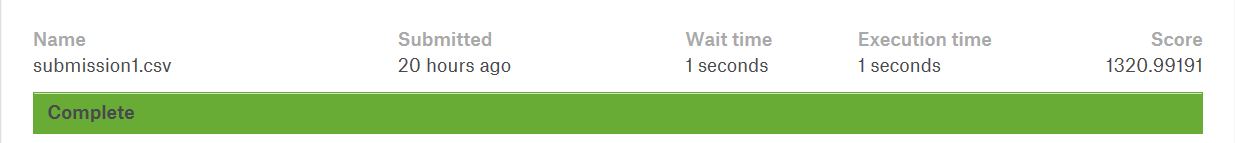